<a href="https://colab.research.google.com/github/kartik941/cardiovascular_disease-analyzer/blob/main/Classification_Use_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cardiovascular-disease-dataset' dataset.
Path to dataset files: /kaggle/input/cardiovascular-disease-dataset


# Environment setup

In [2]:
! pip install ydata_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier ,VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

sns.set(style="whitegrid")
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.3 MB/s eta 0:00:00


# Data Loading

In [3]:
# Loading the dataset
df = pd.read_csv(path + "/cardio_train.csv", delimiter=";")
# displaying the dataset
df.head(),df.shape

(   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
 0   0  18393       2     168    62.0    110     80            1     1      0   
 1   1  20228       1     156    85.0    140     90            3     1      0   
 2   2  18857       1     165    64.0    130     70            3     1      0   
 3   3  17623       2     169    82.0    150    100            1     1      0   
 4   4  17474       1     156    56.0    100     60            1     1      0   
 
    alco  active  cardio  
 0     0       1       0  
 1     0       1       1  
 2     0       0       1  
 3     0       1       1  
 4     0       0       0  ,
 (70000, 13))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# This is a Classification problem because the target 'cardio' is binary (0 or 1).
# 0 = No disease, 1 = Disease present.

* Check for Missing Values

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

* Check for Duplicate Rows¶

In [6]:
dupl = df.duplicated().sum()
print("Number of duplicate rows: " , dupl)

Number of duplicate rows:  0


* Statistical Summary & Logic Checks

In [7]:
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [8]:
# convert age from days to years
df['age_years'] = (df['age'] / 365.25).round(1)
df[['age', 'age_years']].head()

age  age_years
0  18393       50.4
1  20228       55.4
2  18857       51.6
3  17623       48.2
4  17474       47.8

In [9]:
print("Max (ap_hi):", df['ap_hi'].max())
print("Min  (ap_hi):", df['ap_hi'].min())
print("Max  (ap_lo):", df['ap_lo'].max())
print("Min  (ap_lo):", df['ap_lo'].min())

Max (ap_hi): 16020
Min  (ap_hi): -150
Max  (ap_lo): 11000
Min  (ap_lo): -70


In [10]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

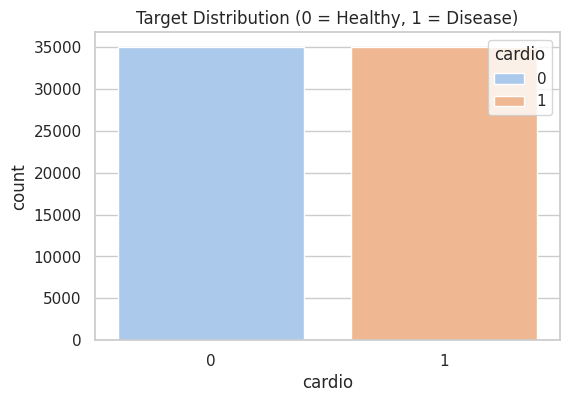

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df, hue='cardio',  palette='pastel')
plt.title('Target Distribution (0 = Healthy, 1 = Disease)')
plt.show()


This shows the dataset is balanced

In [12]:
# 1-> Women 2-> men
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [13]:
# Analyze Cholesterol and Glucose
print("Cholesterol Levels:\n", df['cholesterol'].value_counts())
print("\nGlucose Levels:\n", df['gluc'].value_counts())

Cholesterol Levels:
 cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

Glucose Levels:
 gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64


In [14]:
# Analyze Lifestyle (Smoke & Alcohol)
print("Smokers:\n", df['smoke'].value_counts())
print("\nAlcohol Consumers:\n", df['alco'].value_counts())

Smokers:
 smoke
0    63831
1     6169
Name: count, dtype: int64

Alcohol Consumers:
 alco
0    66236
1     3764
Name: count, dtype: int64


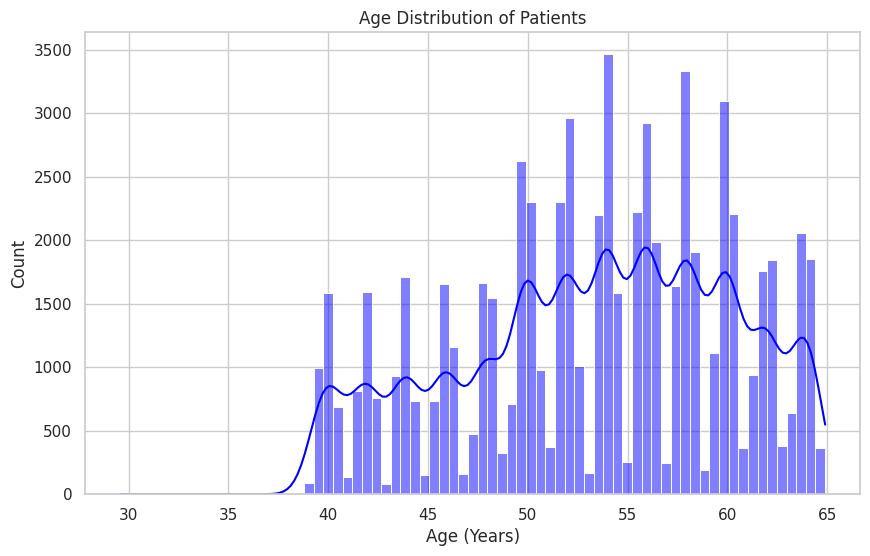

In [15]:
# Age Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'],  kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age (Years)')
plt.show()

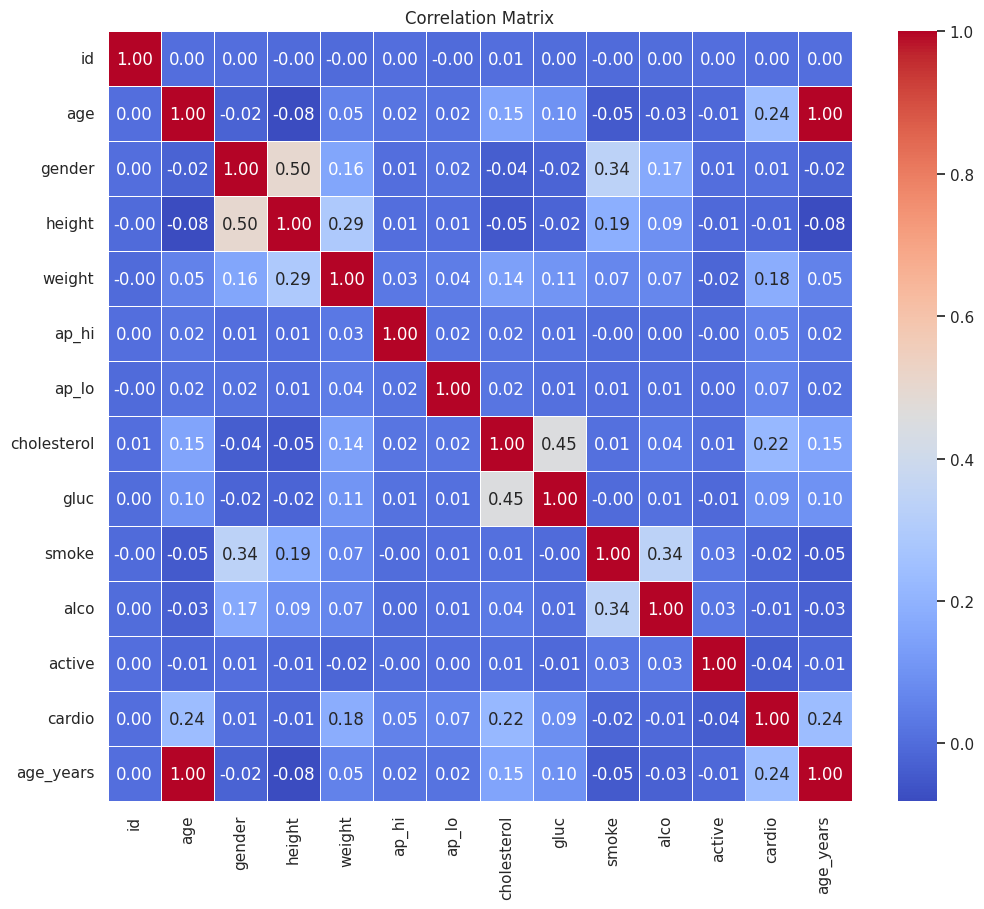

In [16]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
# Calculate correlation matrix
corr = df.corr()
# Plot heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Observation from heatplot
* cardio is being affected by age weight  bp cholestrol and glucose

# univariate data analysis on this

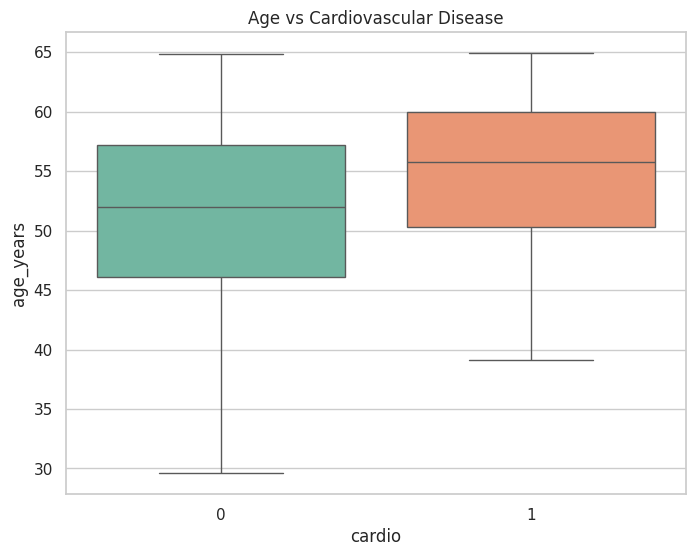

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='age_years', data=df, hue='cardio', legend=False, palette='Set2')
plt.title('Age vs Cardiovascular Disease')
plt.show()

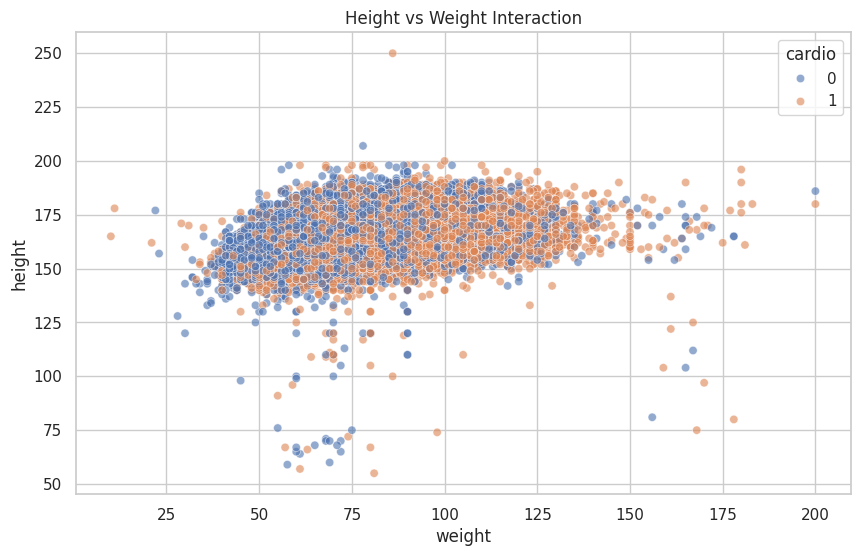

In [18]:
# Weight vs Height Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='height', hue='cardio', data=df, alpha=0.6)
plt.title('Height vs Weight Interaction')
plt.show()

# Observation so far
* ### Critical Observation (Blood Pressure) Outliers detected in Blood Pressure (ap_hi/ap_lo) and Height/Weight which need cleaning
* ### No missing values found (usually), but Y duplicates were removed.
* ### Target class is fairly balanced.


# Data Cleaning

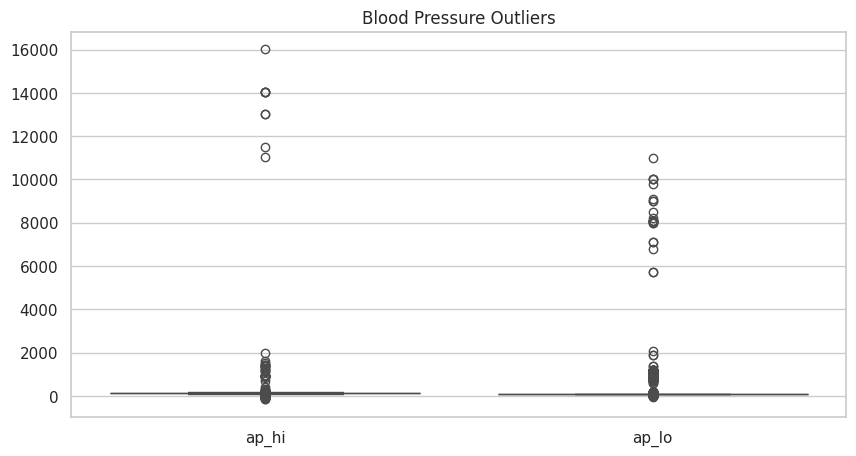

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['ap_hi', 'ap_lo']])
plt.title("Blood Pressure Outliers")
plt.show()

In [20]:
# Filter BP Ranges
Q1 = df["ap_hi"].quantile(0.25)
Q3 = df["ap_hi"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df[(df['ap_hi'] >= lower) & (df['ap_hi'] <= upper)]
Q1 = df["ap_lo"].quantile(0.25)
Q3 = df["ap_lo"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df_clean[(df_clean['ap_lo'] >= lower) & (df_clean['ap_lo'] <= upper)]
print(f"Shape before BP cleaing: {df.shape}")
print(f"Shape after BP cleaning: {df_clean.shape}")

Shape before BP cleaing: (70000, 14)
Shape after BP cleaning: (64502, 14)


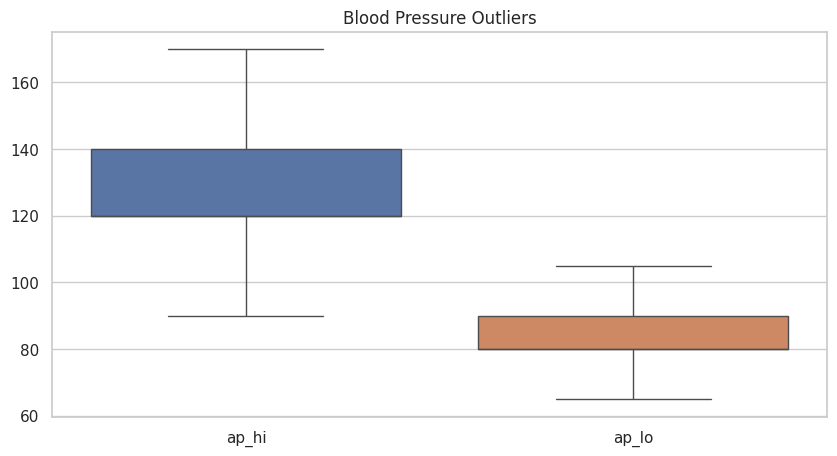

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean[['ap_hi', 'ap_lo']])
plt.title("Blood Pressure Outliers")
plt.show()

# cleaning the height and weight outliers

In [22]:
print(df['height'].max())
print(df['height'].min())
print(df['weight'].max())
print(df['weight'].min())

250
55
200.0
10.0


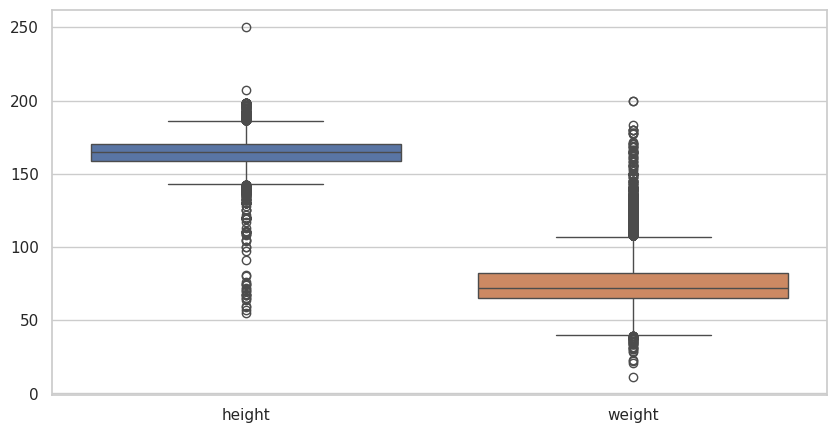

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean[['height', 'weight']])
plt.show()

In [24]:
Q1 = df["height"].quantile(0.25)
Q3 = df["height"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df_clean[(df_clean['height'] >= lower) & (df_clean['height'] <= upper)]
Q1 = df["weight"].quantile(0.25)
Q3 = df["weight"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df_clean[(df_clean['weight'] >= lower) & (df_clean['weight'] <= upper)]
print(f"Shape before BP cleaing: {df.shape}")
print(f"Shape after BP cleaning: {df_clean.shape}")

Shape before BP cleaing: (70000, 14)
Shape after BP cleaning: (62505, 14)


In [25]:
df_clean['bmi'] = df_clean['weight'] / ((df_clean['height'] / 100) ** 2)
df_clean['bmi'] = df_clean['bmi'].round(2)
df_clean[['height', 'weight', 'bmi']].head()

height  weight    bmi
0     168    62.0  21.97
1     156    85.0  34.93
2     165    64.0  23.51
3     169    82.0  28.71
5     151    67.0  29.38

<Axes: ylabel='bmi'>

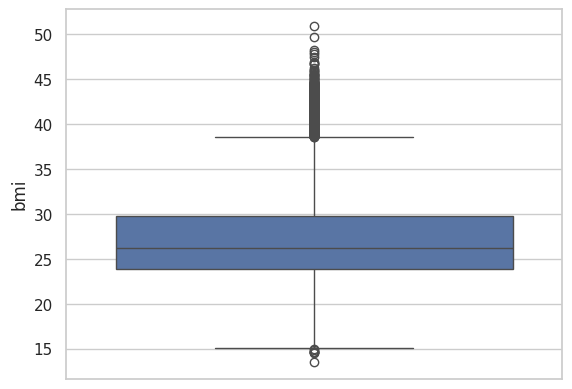

In [26]:
sns.boxplot(data=df_clean['bmi'])

In [27]:
# BMI:- Underweight (< 18.5) | Normal (18.5 - 24.9) | Overweight (25 - 29.9) | Obese (>= 30)
def bmi_cat(bmi):
    if bmi < 18.5:
        return 1
    elif 18.5 <= bmi < 25:
        return 2
    elif 25 <= bmi < 30:
        return 3
    else:
        return 4

df_clean['bmi_cat'] = df_clean['bmi'].apply(bmi_cat)
df_clean['bmi_cat'].value_counts()

bmi_cat
2    23466
3    23281
4    15279
1      479
Name: count, dtype: int64

In [28]:
profile = ProfileReport(df_clean, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:01<00:00, 13.73it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

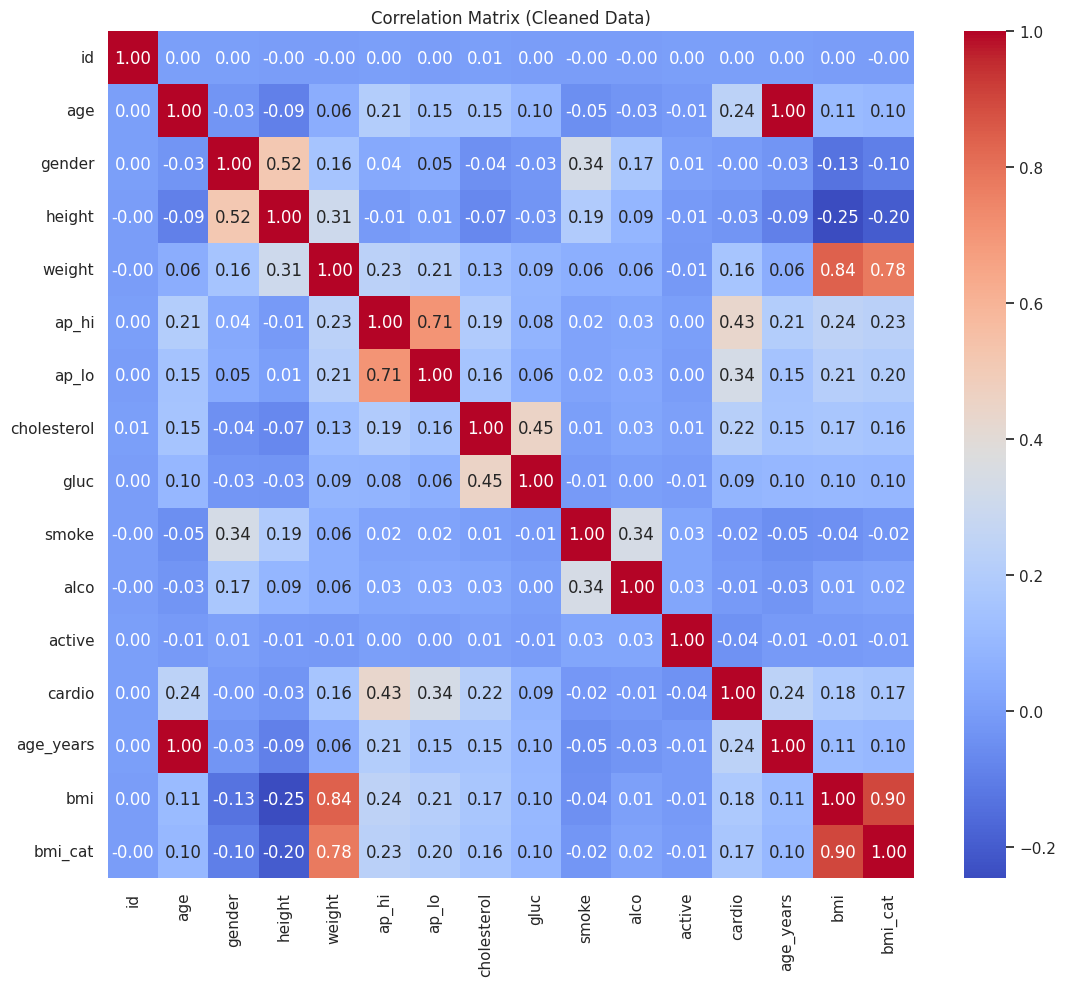

In [29]:
plt.figure(figsize=(13, 11))
numeric_df = df_clean.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Cleaned Data)")
plt.show()

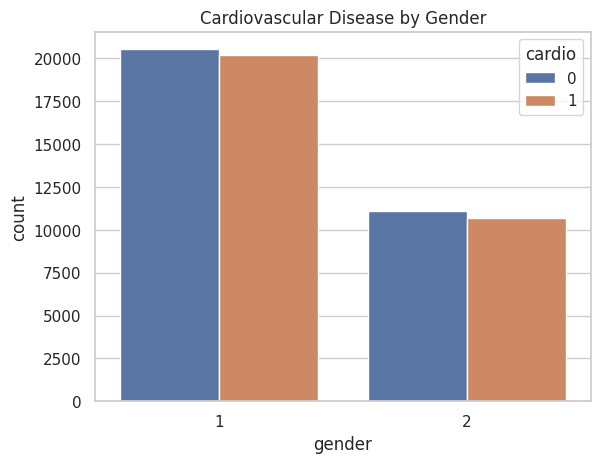

In [30]:
sns.countplot(x='gender', hue='cardio', data=df_clean)
plt.title("Cardiovascular Disease by Gender")
plt.show()

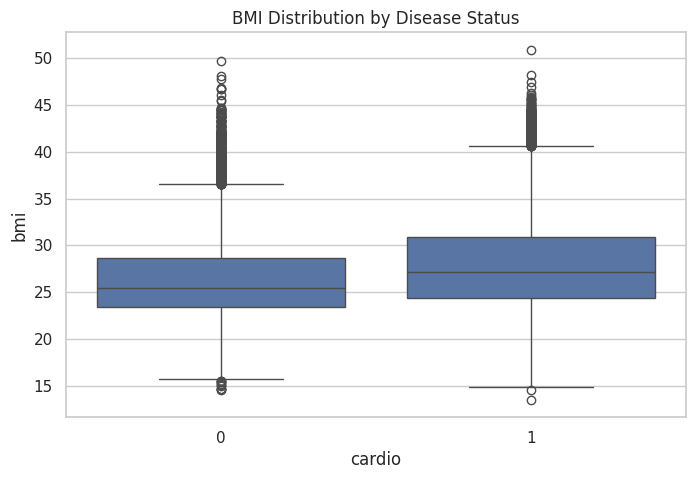

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cardio', y='bmi', data=df_clean)
plt.title("BMI Distribution by Disease Status")
plt.show()

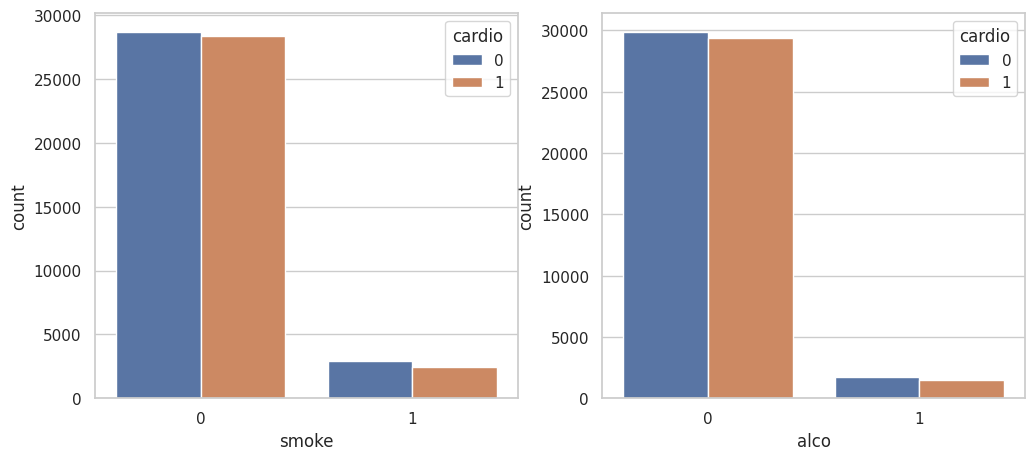

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='smoke', hue='cardio', data=df_clean, ax=axes[0])
sns.countplot(x='alco', hue='cardio', data=df_clean, ax=axes[1])
plt.show()

In [33]:
df_clean = df_clean.drop(columns = "id")
df_clean

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
5      21914       1     151    67.0    120     80            2     2      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  age_years    bmi  bmi_cat  
0         0       1       0       50.4  21.97        2  
1         0       1       1       55.4  34.93        4  
2         0       0       1       51.6  23.51        2  
3         0       1       1       48.2  28.71        3  
5         0       0       0       60.0  29.38        3  
...     ...     ...     ...        ...    ...      ...  
69993     0       1       1       53.9  23.66        2  
69994     0       1       1       57.7  29.38        3  
69995     0       1       0       52.7  26.93        3  
69998     0       0       1       61.4  27.10        3  
69999     0       1       0       56.2  24.91        2  

[62505 rows x 15 columns]

In [34]:
X = df_clean.drop(['cardio','age','bmi_cat'], axis=1)
y = df_clean['cardio']

In [35]:
print(X)
print(y)

       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
5           1     151    67.0    120     80            2     2      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69993       1     172    70.0    130     90            1     1      0     0   
69994       1     165    80.0    150     80            1     1      0     0   
69995       2     168    76.0    120     80            1     1      1     0   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  age_years    bmi  
0           1    

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape:  {X_test.shape}")
from sklearn.pipeline import Pipeline

Training Shape: (50004, 12)
Testing Shape:  (12501, 12)


In [ ]:

rf_pipe = Pipeline([
    ("model", RandomForestClassifier(
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])
rf_param_grid = {
    "model__n_estimators": [200, 300],
    "model__max_depth": [10, 12, None],
    "model__min_samples_split": [10, 15],
    "model__min_samples_leaf": [3, 5],
    "model__max_features": ["sqrt", "log2"]
}
rf_grid = GridSearchCV(
    rf_pipe,
    rf_param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)
best_model = rf_grid.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)

In [ ]:
import pickle
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

In [ ]:
gb_pipe = Pipeline([
    ("model", GradientBoostingClassifier(random_state=42))
])
gb_param_grid = {
    "model__n_estimators": [200, 300],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 4],
    "model__min_samples_split": [10, 20],
    "model__min_samples_leaf": [10, 15],
    "model__subsample": [0.8, 1.0],
    "model__max_features": ["sqrt", None]
}
gb_grid = GridSearchCV(
    gb_pipe,
    gb_param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2
)

gb_grid.fit(X_train, y_train)
best_model = gb_grid.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 128 candidates, totalling 640 fits


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)

[[4951 1432]
 [1927 4191]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6383
           1       0.75      0.69      0.71      6118

    accuracy                           0.73     12501
   macro avg       0.73      0.73      0.73     12501
weighted avg       0.73      0.73      0.73     12501

ROC-AUC: 0.7941684062208187


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5022 1361]
 [2124 3994]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print(auc)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6383
           1       0.75      0.65      0.70      6118

    accuracy                           0.72     12501
   macro avg       0.72      0.72      0.72     12501
weighted avg       0.72      0.72      0.72     12501

0.7828070634664845
